# president_heights.csv에 대한 EDA

## 문제 정의 : 미국 대통령 평균 신장은 얼마일까?

## DataSet 구성

1. 미국 대통령 순번
2. 대통령 이름
3. 키

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# matplotlib 한글 폰트 오류 문제 해결 - windows
#from matplotlib import font_manager, rc
#font_path = "C:\\Windows\\Fonts\\malgun.ttf" # 폰트 파일 위치
#font_name = font_manager.FontProperties( fname = font_path ).get_name()
#rc( 'font', family = font_name )

# matplotlib 한글 폰트 오류 문제 해결 - mac 
from matplotlib import rc
rc( 'font', family = 'AppleGothic' )

# IPython 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option( 'display.max_columns', 20 ) # 출력할 열의 개수 한도
pd.set_option( 'display.max_colwidth', 20 ) # 출력할 열의 너비
pd.set_option( 'display.unicode.east_asian_width', True ) # 유니코드 사용 너비 조정

import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount( '/content/drive' )

Mounted at /content/drive


## 데이터 수집

- DataFrame 생성
- DataFrame 기본 정보 확인

In [5]:
df = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/202104AI_B_Workspace/president_heights.csv',
                  index_col = 0 )

In [6]:
df.head()

,name,height(cm)
order,,
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183


In [7]:
df.tail()

,name,height(cm)
order,,
40,Ronald Reagan,185
41,George H. W. Bush,188
42,Bill Clinton,188
43,George W. Bush,182
44,Barack Obama,185


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 44
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        42 non-null     object
 1   height(cm)  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


In [9]:
df.shape

(42, 2)

In [10]:
df.dtypes

name          object
height(cm)     int64
dtype: object

## 데이터 전처리

### 변수 이름 변경

In [11]:
df.rename( columns = { 'height(cm)': 'height' }, inplace = True )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    42 non-null     object
 1   height  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


### 결측치 확인

In [13]:
df.isnull().sum( axis = 0 )

name      0
height    0
dtype: int64

### 중복 데이터 확인

In [14]:
df.duplicated().sum( axis = 0 )

0

### 이상치 확인

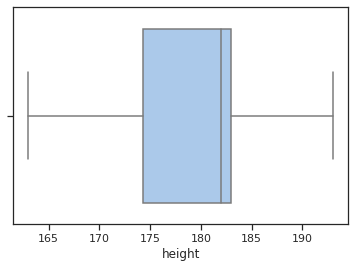

In [15]:
sns.set_theme( style = 'ticks', palette = 'pastel' )

sns.boxplot( x = df[ 'height' ] )
#df[ [ 'height' ] ].plot( kind = 'box' )

## EDA

### 역대 대통령 신장

In [16]:
df

,name,height
order,,
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Ha...,173


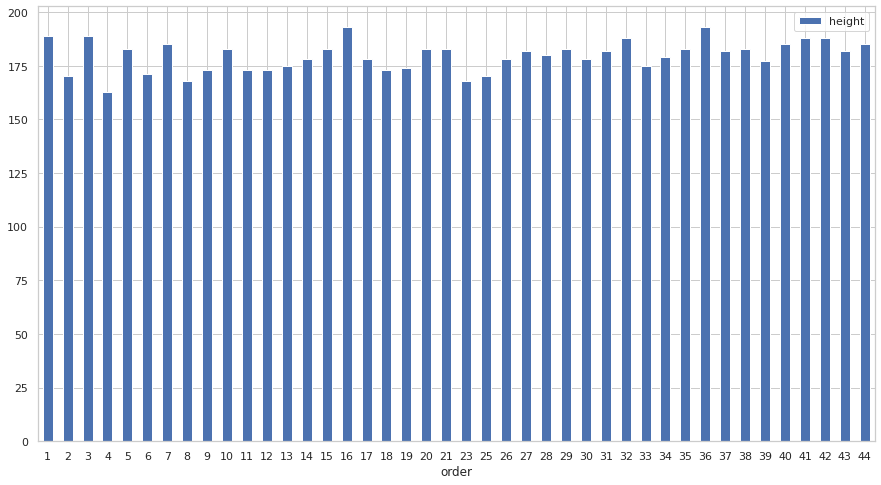

In [28]:
sns.set_theme( style = 'whitegrid' )

ax = df.plot( kind = 'bar', figsize = ( 15, 8 ) )
ax.set_xticklabels( df.index, rotation = 0 )

plt.show()

### 역대 대통령 신장( 큰신장에서 작은 신장순 )

In [29]:
df_sort = df.sort_values( by = 'height', ascending = False )
df_sort

,name,height
order,,
16,Abraham Lincoln,193
36,Lyndon B. Johnson,193
1,George Washington,189
3,Thomas Jefferson,189
42,Bill Clinton,188
41,George H. W. Bush,188
32,Franklin D. Roos...,188
40,Ronald Reagan,185
44,Barack Obama,185


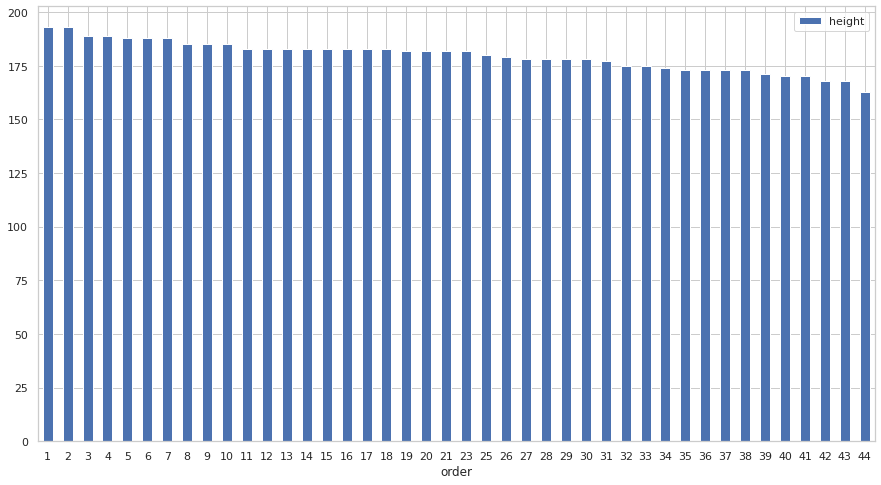

In [30]:
sns.set_theme( style = 'whitegrid' )

ax = df_sort.plot( kind = 'bar', figsize = ( 15, 8 ) )
ax.set_xticklabels( df.index, rotation = 0 )

plt.show()

### 미국 역대 대통령 신장 요약 정보

In [31]:
df.describe()

,height
count,42.000000
mean,179.738095
std,7.015869
min,163.000000
25%,174.250000
50%,182.000000
75%,183.000000
max,193.000000


### 미국 역대 대통령중 최소 신장 대통령 정보

In [32]:
mask = df[ 'height' ] <= df[ 'height' ].min()
height_min = df[ mask ]
height_min

,name,height
order,,
4,James Madison,163


### 미국 역대 대통령중 최고 신장 대통령 정보

In [33]:
mask = df[ 'height' ] >= df[ 'height' ].max()
height_max = df[ mask ]
height_max

,name,height
order,,
16,Abraham Lincoln,193
36,Lyndon B. Johnson,193


### 미국 역대 대통령 신장 구간 분활

In [34]:
count, bin_dividers = np.histogram( df[ 'height' ], bins = 4 )

print( '미국 역대 대통령 신장을 4구간으로 분활' )
print( '구간별 인원수 {}\t 구간 분할 경계 {}'.format( count, bin_dividers ) )

미국 역대 대통령 신장을 4구간으로 분활
구간별 인원수 [ 5  9 21  7]	 구간 분할 경계 [163.  170.5 178.  185.5 193. ]


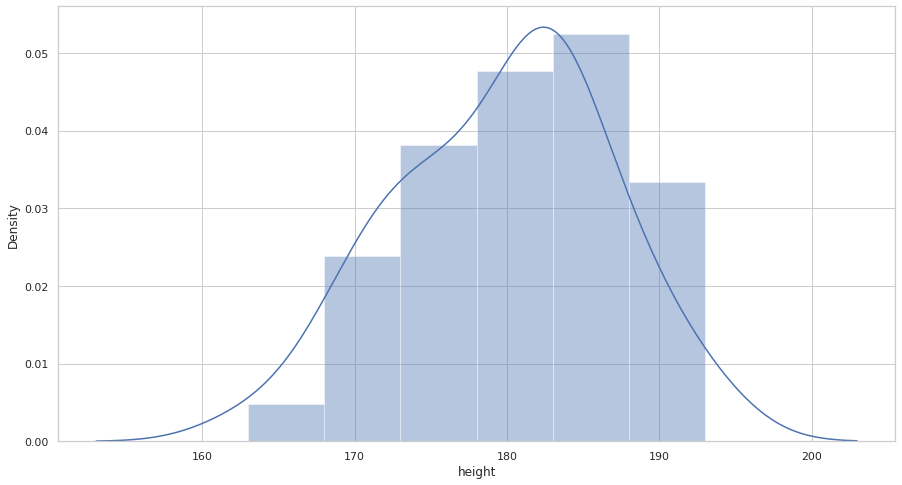

In [38]:
sns.set_theme( style = 'whitegrid' )

plt.figure( figsize = ( 15, 8 ) )
sns.distplot( df[ 'height' ], kde = True )

### 미국 역대 대통령 평균 신장

In [39]:
mean_height = df.height.mean()
round( mean_height, 2 )

179.74

### 미국 역대 대통령중 평균 신장 미만 대통령

In [40]:
mean_height_under = df.loc[ df.height < mean_height ]
mean_height_under.sort_values( by = 'height' )

,name,height
order,,
4,James Madison,163
8,Martin Van Buren,168
23,Benjamin Harrison,168
2,John Adams,170
25,William McKinley,170
6,John Quincy Adams,171
9,William Henry Ha...,173
11,James K. Polk,173
12,Zachary Taylor,173


In [ ]:
print( '미국 역대 대통령중 평균 신장 미만 대통령 수 : {}명'.format( mean_height_under.height.count() ) )

미국 역대 대통령중 평균 신장 미만 대통령 수 : 19명


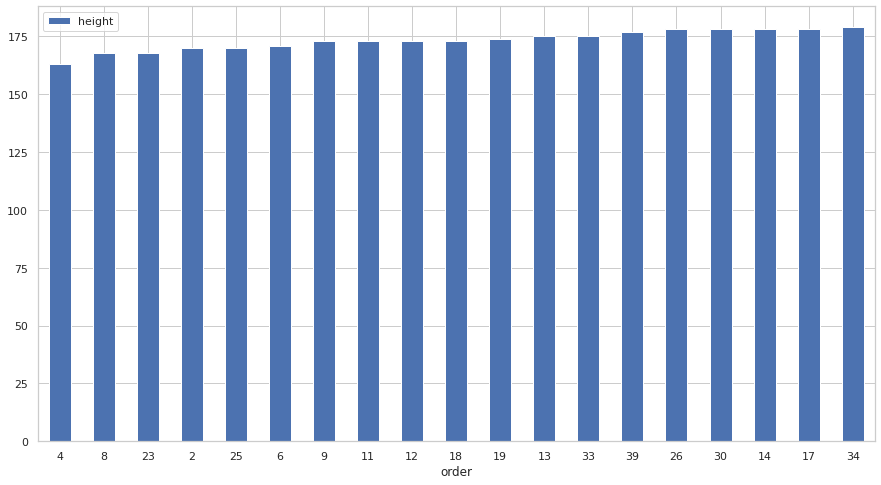

In [43]:
sns.set_theme( style = 'whitegrid' )

mean_height_under_sort = mean_height_under.sort_values( by = 'height' )
ax = mean_height_under_sort.plot( kind = 'bar', figsize = ( 15, 8 ) )
ax.set_xticklabels( mean_height_under_sort.index, rotation = 0 )

plt.show()

### 미국 역대 대통령중 평균 신장 이상 대통령

In [46]:
mean_height_above = df.loc[ df.height >= mean_height ]
mean_height_above.sort_values( by = 'height' )

,name,height
order,,
28,Woodrow Wilson,180
37,Richard Nixon,182
27,William Howard Taft,182
43,George W. Bush,182
31,Herbert Hoover,182
29,Warren G. Harding,183
5,James Monroe,183
38,Gerald Ford,183
10,John Tyler,183


In [47]:
print( '미국 역대 대통령중 평균 신장 이상 대통령 수 : {}명'.format( mean_height_under.height.count() ) )

미국 역대 대통령중 평균 신장 이상 대통령 수 : 19명


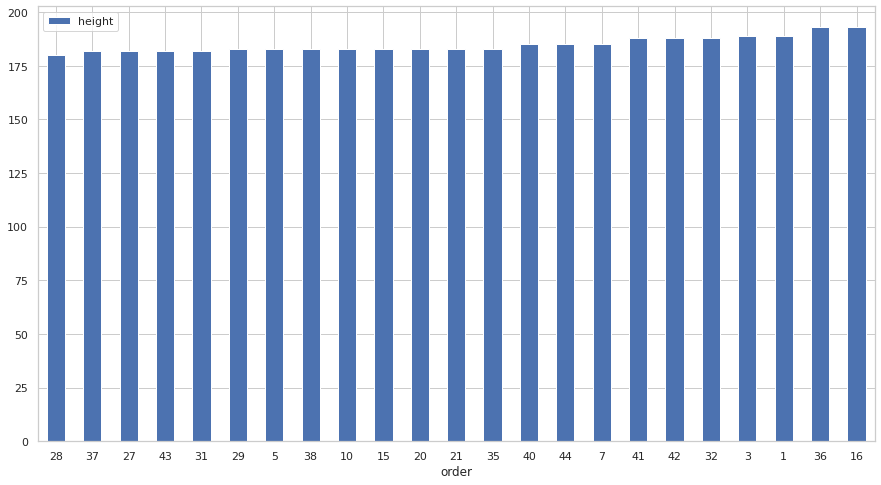

In [48]:
sns.set_theme( style = 'whitegrid' )

mean_height_above_sort = mean_height_above.sort_values( by = 'height' )
ax = mean_height_above_sort.plot( kind = 'bar', figsize = ( 15, 8 ) )
ax.set_xticklabels( mean_height_above_sort.index, rotation = 0 )

plt.show()